Predicción de Calidad del Vino (Core)


Objetivo

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

Dataset: Wine Quality Dataset

Descripción del Dataset: Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

# 1. Carga y Exploración de Datos:

* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.metrics import precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV

In [7]:
# cargar el dataset automobile data
data = pd.read_csv('../data/WineQT.csv')
print(data.shape)
print(data.columns)
data.info()
data.head(5)

(1143, 13)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-nu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Valores faltantes: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


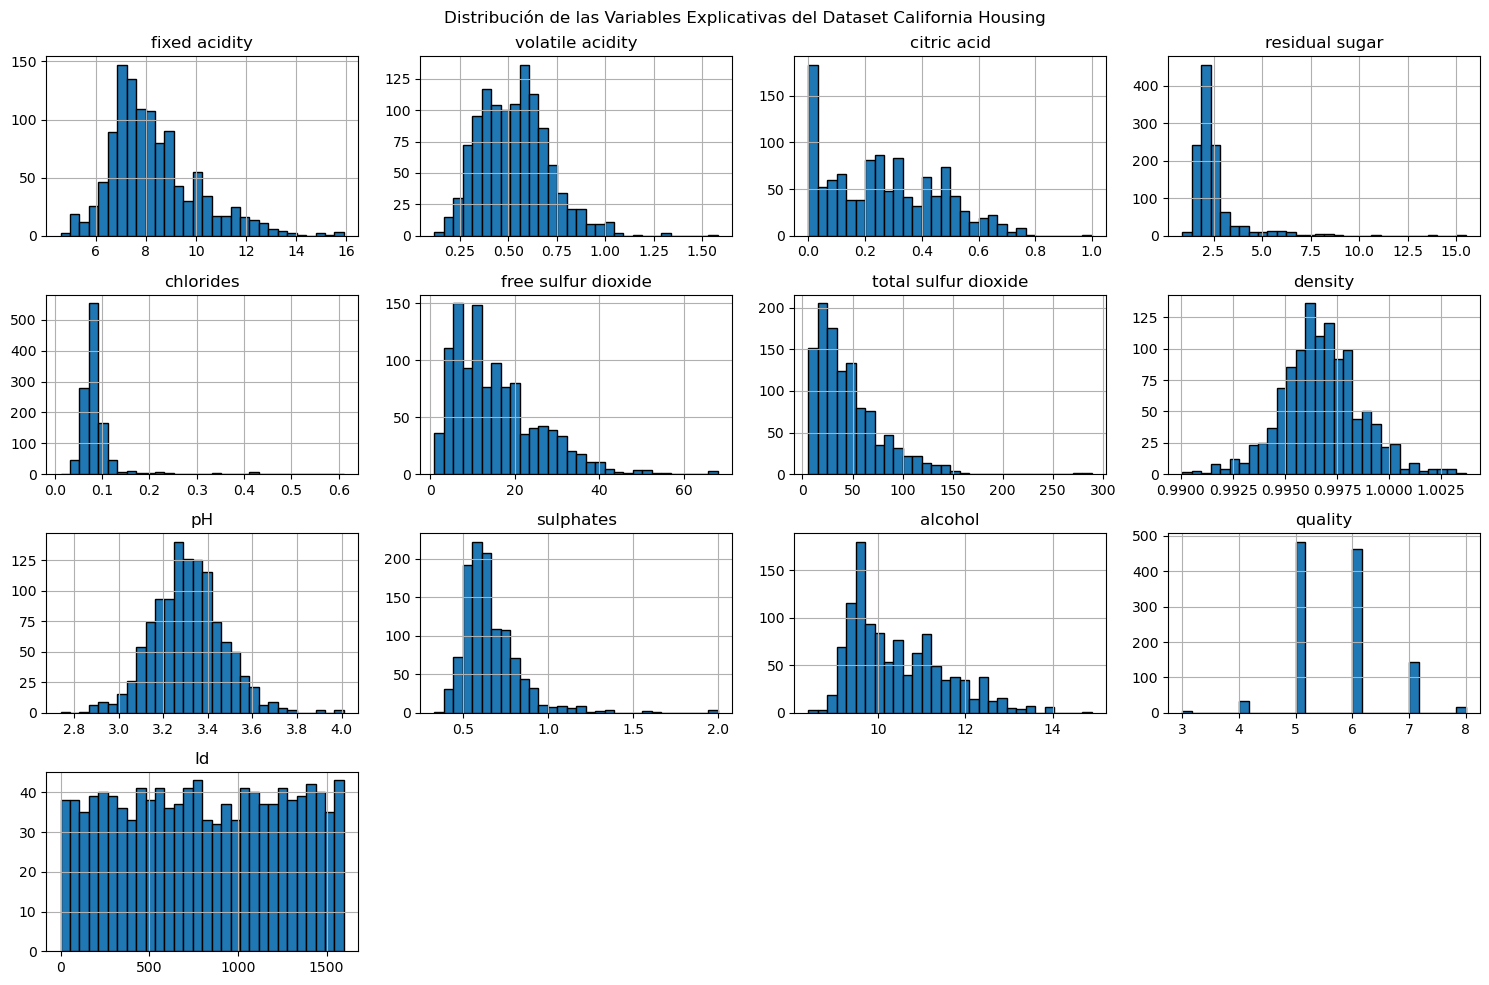

In [8]:
print("Valores faltantes:", data.isnull().sum())

# Crear histogramas para cada característica
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset California Housing')
plt.tight_layout()
plt.show()


In [9]:
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


 # 2. Preprocesamiento de Datos:
* Seleccionar características importantes para la clasificación.
* Transformar variables categóricas en variables numéricas si es necesario.
* Dividir los datos en conjuntos de entrenamiento y prueba.
* Escalar las características.

In [20]:
# Seleccionar características y variable objetivo
X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
          'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos con StandardScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  3. Entrenamiento de Modelos de Clasificación:

* Entrenar al menos tres modelos de clasificación diferentes
* Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

## Modelo con KNeighborsClassifier

In [11]:

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)



Exactitud: 0.5895196506550219
Informe de Clasificación:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.65      0.69      0.67        96
           6       0.55      0.62      0.58        99
           7       0.47      0.31      0.37        26
           8       1.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.73      0.32      0.32       229
weighted avg       0.60      0.59      0.57       229

Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 0 66 29  1  0]
 [ 0 31 61  7  0]
 [ 0  2 16  8  0]
 [ 0  0  1  1  0]]


Mejor valor de K: 24


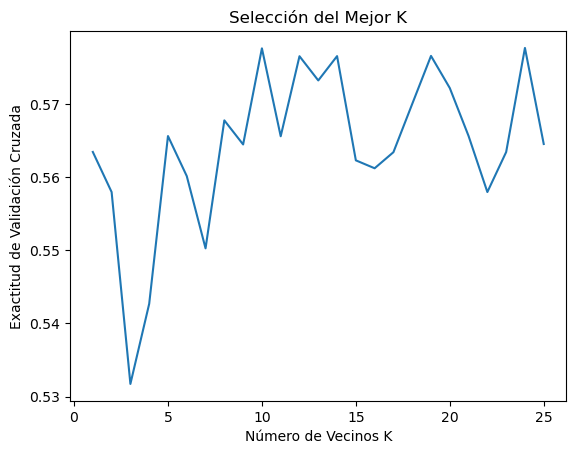

In [47]:
# Probar diferentes valores de K
k_values = range(1, 26)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
    cv_scores.append(scores.mean())

# Seleccionar el K con la mayor exactitud
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Mejor valor de K: {optimal_k}')

# Gráfico de la exactitud en función de K
plt.plot(k_values, cv_scores)
plt.xlabel('Número de Vecinos K')
plt.ylabel('Exactitud de Validación Cruzada')
plt.title('Selección del Mejor K')
plt.show()

## Modelo con Random Forest Classifier

In [42]:
# Entrenar el modelo Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)



Exactitud: 0.6943231441048034
Informe de Clasificación:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.67      0.65      0.66        99
           7       0.69      0.69      0.69        26
           8       1.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.82      0.43      0.42       229
weighted avg       0.70      0.69      0.68       229

Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 64  7  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


In [49]:

# Definir el modelo base
model = RandomForestClassifier(random_state=42)

# Especificar el rango de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100],  # Número de árboles
    'max_depth': [None, 10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]  # Si se usa bootstrap para crear las muestras
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor puntuación
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores parámetros encontrados:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mejor puntuación de validación cruzada: 0.65


# Logistic Regression

In [50]:

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=100, random_state=42)
logistic_model.fit(X_train, y_train)

# Predicción
y_pred = logistic_model.predict(X_test)

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred, zero_division=1))




Matriz de Confusión:
[[ 0  3  3  0  0]
 [ 1 70 23  2  0]
 [ 0 28 63  8  0]
 [ 0  2 14 10  0]
 [ 0  0  0  2  0]]
Exactitud: 0.6244541484716157
Informe de Clasificación:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.73      0.70        96
           6       0.61      0.64      0.62        99
           7       0.45      0.38      0.42        26
           8       1.00      0.00      0.00         2

    accuracy                           0.62       229
   macro avg       0.55      0.35      0.35       229
weighted avg       0.61      0.62      0.61       229



#  5. Análisis y Comparación de Resultados:

* El random forest classifier tiene el mejor reusltado para este caso con uma presicion de 0.69
* Es necesario mencionar que el dataset tiene una muy mala distribucion de datos lo cual afecta la precisión de los modelos y se desconoce los datos tecnicos para tratarlos adecuadamente
